# English Alphabet Classification Recognition using MLP approach

### The aim of this project is to recognize the computerised generated images of the English apphabets. The dataset contains 26 classes which comprises of a to z alphabets, each class containing 100 images. Here first we will first try training a Multi Layer Perceptron model and check its accuracy.

In [1]:
import tensorflow as tf
import cv2
from glob import glob
from matplotlib import pyplot as plt
import random
import math
import os
import numpy as np
from numpy.random import seed
seed(100)
tf.random.set_seed(101) 

In [2]:
for dirname, _, filenames in os.walk(r'C:\Users\KIIT\Documents\LGM-Soc contributions\English Alphabet Classification\Dataset\images/'):
    print(dirname)

C:\Users\KIIT\Documents\LGM-Soc contributions\English Alphabet Classification\Dataset\images/
C:\Users\KIIT\Documents\LGM-Soc contributions\English Alphabet Classification\Dataset\images/a
C:\Users\KIIT\Documents\LGM-Soc contributions\English Alphabet Classification\Dataset\images/b
C:\Users\KIIT\Documents\LGM-Soc contributions\English Alphabet Classification\Dataset\images/c
C:\Users\KIIT\Documents\LGM-Soc contributions\English Alphabet Classification\Dataset\images/d
C:\Users\KIIT\Documents\LGM-Soc contributions\English Alphabet Classification\Dataset\images/e
C:\Users\KIIT\Documents\LGM-Soc contributions\English Alphabet Classification\Dataset\images/f
C:\Users\KIIT\Documents\LGM-Soc contributions\English Alphabet Classification\Dataset\images/g
C:\Users\KIIT\Documents\LGM-Soc contributions\English Alphabet Classification\Dataset\images/h
C:\Users\KIIT\Documents\LGM-Soc contributions\English Alphabet Classification\Dataset\images/i
C:\Users\KIIT\Documents\LGM-Soc contributions\Engli

### Defining a function to display sample images from the dataset when their corresponding labels are given as input 

In [3]:
def plotSample(character):
    print("Samples images of English Alphabet " + character)
    basePath = r'C:\Users\KIIT\Documents\LGM-Soc contributions\English Alphabet Classification\Dataset\images/'
    imagePath = basePath + character + '/**'
    pathData = glob(imagePath)
    
    plt.figure(figsize=(16,16))
    images = random.sample(pathData, 3)
    plt.subplot(1,3,1)
    plt.imshow(cv2.imread(images[0]))
    plt.subplot(1,3,2)
    plt.imshow(cv2.imread(images[1]))
    plt.subplot(1,3,3)
    plt.imshow(cv2.imread(images[2]))
    plt.colorbar()
    plt.show()
    return

Samples images of English Alphabet x


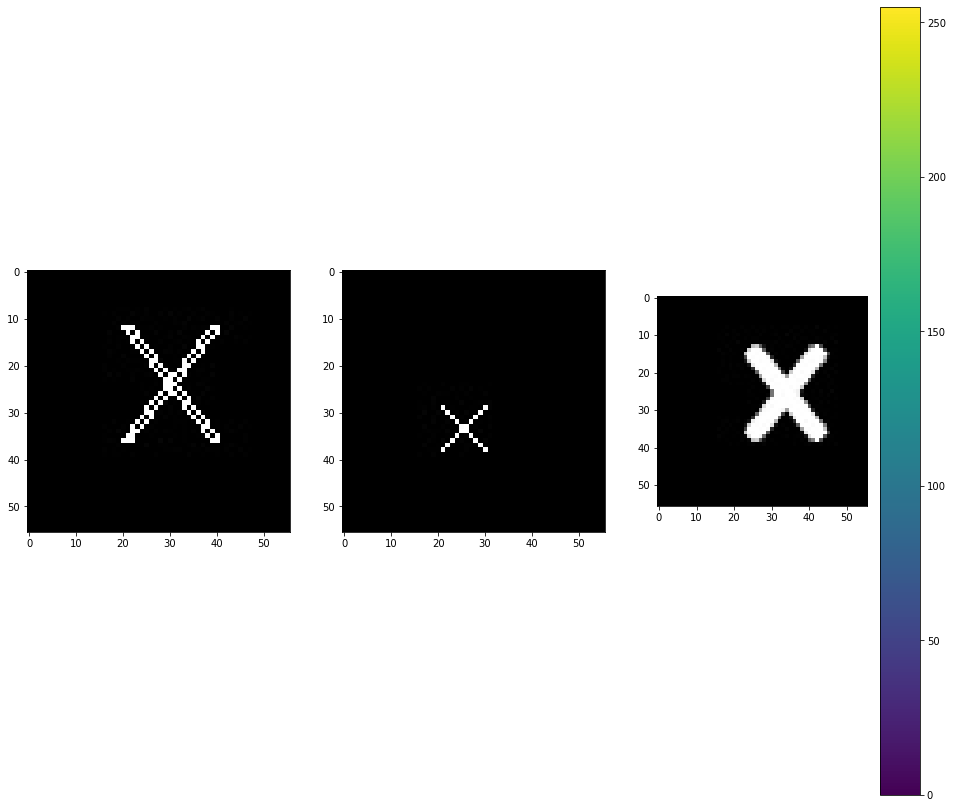

In [4]:
plotSample('x')

### Performing Data Augmentation using ImageDataGenerator to import training images and augment more images

In [5]:
dataPath =  r'C:\Users\KIIT\Documents\LGM-Soc contributions\English Alphabet Classification\Dataset\images/'
resizeTuple = (64, 64)
resizeDim = (64, 64, 3)
numLabels = 29
batchSize = 64

data_generator = tf.keras.preprocessing.image.ImageDataGenerator(samplewise_center=True, 
                                    samplewise_std_normalization=True, 
                                    validation_split=0.1)

train_generator = data_generator.flow_from_directory(dataPath, target_size=resizeTuple, batch_size=batchSize, shuffle=True, subset="training")
val_generator = data_generator.flow_from_directory(dataPath, target_size=resizeTuple, batch_size=batchSize, subset="validation")

Found 2340 images belonging to 26 classes.
Found 260 images belonging to 26 classes.


## Building the Multi Layer Perceptron model 

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=resizeDim),
    tf.keras.layers.Dense(200, activation = "relu", kernel_regularizer = tf.keras.regularizers.l2(0.005)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(200, activation = "relu", kernel_regularizer = tf.keras.regularizers.l2(0.005)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(200, activation = "relu", kernel_regularizer = tf.keras.regularizers.l2(0.005)),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(50, activation = "relu"),
    tf.keras.layers.Dense(26, activation = "softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 12288)             0         
_________________________________________________________________
dense (Dense)                (None, 200)               2457800   
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               2

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

#### Defining a function to determine the learning_rate decay based on epoch schedule.

In [8]:
def scheduler(epoch):
    if epoch < 25:
        return 0.00001
    else:
        return 0.00001 * math.exp(0.1 * (25 - epoch))

In [9]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [10]:
history = model.fit_generator(train_generator, epochs=50,validation_data=val_generator, callbacks = [callback], verbose = 1)

Epoch 1/50

C:\Users\KIIT\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '



37/37 [==============================] - 4s 80ms/step - loss: 7.2495 - accuracy: 0.0426 - val_loss: 7.1932 - val_accuracy: 0.0462
Epoch 2/50
37/37 [==============================] - 3s 75ms/step - loss: 7.1695 - accuracy: 0.0616 - val_loss: 7.1311 - val_accuracy: 0.0769
Epoch 3/50
37/37 [==============================] - 2s 62ms/step - loss: 7.1178 - accuracy: 0.0877 - val_loss: 7.0690 - val_accuracy: 0.1115
Epoch 4/50
37/37 [==============================] - 2s 62ms/step - loss: 7.0411 - accuracy: 0.1055 - val_loss: 7.0022 - val_accuracy: 0.1077
Epoch 5/50
37/37 [==============================] - 3s 70ms/step - loss: 6.9853 - accuracy: 0.1182 - val_loss: 6.9319 - val_accuracy: 0.1308
Epoch 6/50
37/37 [==============================] - 2s 64ms/step - loss: 6.9269 - accuracy: 0.1257 - val_loss: 6.8637 - val_accuracy: 0.1346
Epoch 7/50
37/37 [==============================] - 3s 69ms/step - loss: 6.8484 - accuracy: 0.1480 - val_loss: 6.7968 - val_accuracy: 0.1423
Epoch 8/50
37/37 [=====

In [11]:
import pandas as pd
history_df = pd.DataFrame(history.history)

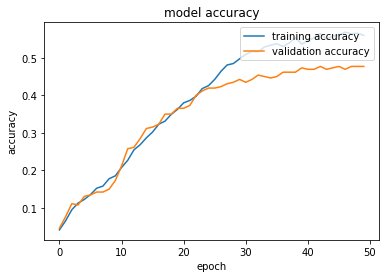

In [12]:
history_df.loc[0:, ['accuracy','val_accuracy']].plot()
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training accuracy', 'validation accuracy'], loc='upper right')
plt.show()

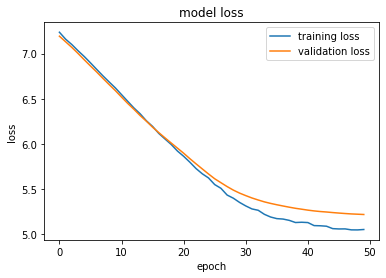

In [13]:
history_df.loc[0:, ['loss', 'val_loss']].plot()
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'validation loss'], loc='upper right')
plt.show()

### After training and testing the MLP model we can conclude that it reaches a training accuracy of 57.15% and validation accuracy of 47.69%.

###  Inference -  Since the validation accuracy and the training accuracy is my much less, we can say that the MLP model is not the right choice for this type of multiclass classification.


### Moreover, multi layer perceptron network is not considered to be very efficient over image data. Convolutional neural networks are considered to be more efficient since they also take into consideration, the pixels with their spatial structure and hence perform better than MLP networks. Therefore now we will try this project with CNN approach.